# 零基础实战机器学习

## 第17讲 集成学习-裂变转化预测

作者 黄佳

极客时间专栏链接：https://time.geekbang.org/column/intro/438


问题：通过集成学习方法预测用户是否会购买促销品

易速鲜花公司推出两张促销方案，分别是疯狂打折和买一送一。

通过集成学习方法，我们可以预测出用户是否会购买这些打折商品。


In [1]:
import pandas as pd #导入Pandas
import numpy as np #导入NumPy
df_fission = pd.read_csv('易速鲜花裂变转化.csv') #载入数据
print('用户数:', df_fission.count()['用户码']) #查看数据条目数
df_fission #显示头几行数据

用户数: 10000


,用户码,性别,年龄,城市,入会月数,会员类型,活跃用户,会员积分,总消费,年收入,裂变方案,是否转化
0,1,女,40,杭州,9,2,1,516,6360.66,0.0000,疯狂打折,0
1,2,男,69,杭州,6,2,1,682,28605.00,0.0000,疯狂打折,0
2,3,女,32,杭州,9,1,1,803,10378.09,236311.0932,买一送一,1
3,4,女,37,苏州,0,2,1,778,25564.01,129909.8079,买一送一,1
4,5,男,55,苏州,4,3,0,547,3235.61,136976.1948,买一送一,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,男,49,扬州,7,2,1,746,1930.44,0.0000,疯狂打折,0
9996,9997,男,36,杭州,1,1,0,569,29593.82,82517.8587,买一送一,0
9997,9998,女,55,扬州,7,1,0,850,32841.84,0.0000,疯狂打折,1
9998,9999,男,35,扬州,5,1,1,529,21564.34,117800.7531,买一送一,0


In [2]:
# 把二元类别文本数字化
df_fission['性别'].replace("女",0,inplace = True)
df_fission['性别'].replace("男",1,inplace=True)
# 显示数字类别
print("Gender unique values",df_fission['性别'].unique())
# 把多元类别转换成多个二元哑变量，然后贴回原始数据集
df_fission = pd.get_dummies(df_fission, drop_first = True)
# df_fission = [df_fission, d_city]
# df_fission = pd.concat(df_bank, axis = 1)
# 构建特征和标签集合
# y = df_fission['Exited']
# X = df_fission.drop(['Name', 'Exited', 'City'], axis=1)
# X.head() #显示新的特征集
df_fission

Gender unique values [0 1]


,用户码,性别,年龄,入会月数,会员类型,活跃用户,会员积分,总消费,年收入,是否转化,城市_杭州,城市_苏州,裂变方案_疯狂打折
0,1,0,40,9,2,1,516,6360.66,0.0000,0,True,False,True
1,2,1,69,6,2,1,682,28605.00,0.0000,0,True,False,True
2,3,0,32,9,1,1,803,10378.09,236311.0932,1,True,False,False
3,4,0,37,0,2,1,778,25564.01,129909.8079,1,False,True,False
4,5,1,55,4,3,0,547,3235.61,136976.1948,1,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1,49,7,2,1,746,1930.44,0.0000,0,False,False,True
9996,9997,1,36,1,1,0,569,29593.82,82517.8587,0,True,False,False
9997,9998,0,55,7,1,0,850,32841.84,0.0000,1,False,False,True
9998,9999,1,35,5,1,1,529,21564.34,117800.7531,0,False,False,False


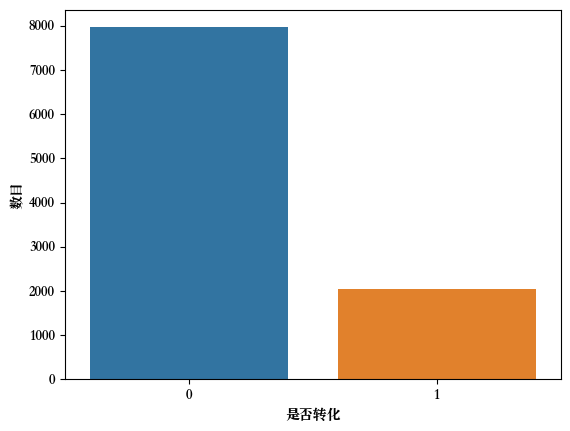

In [3]:
import matplotlib.pyplot as plt #导入pyplot模块
plt.rcParams['font.sans-serif']='Songti SC' # 设置字体，必须是本地有的
import seaborn as sns #导入Seaborn
fig = sns.countplot(x='是否转化', data=df_fission) #创建柱状计数图
# fig.set_xticklabels(fig.get_xticklabels(),rotation=25) #X轴标签倾斜
fig.set_ylabel("数目") #Y轴标题
plt.show() #显示图像

### 构建特征和标签数据集

In [4]:
# df_fission = df_fission.query("裂变类型 == '助力砍价'")

In [5]:
X = df_fission.drop(['用户码','是否转化'], axis = 1) # 构建特征集
y = df_fission.是否转化.values # 构建标签集

In [6]:
X

,性别,年龄,入会月数,会员类型,活跃用户,会员积分,总消费,年收入,城市_杭州,城市_苏州,裂变方案_疯狂打折
0,0,40,9,2,1,516,6360.66,0.0000,True,False,True
1,1,69,6,2,1,682,28605.00,0.0000,True,False,True
2,0,32,9,1,1,803,10378.09,236311.0932,True,False,False
3,0,37,0,2,1,778,25564.01,129909.8079,False,True,False
4,1,55,4,3,0,547,3235.61,136976.1948,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,1,49,7,2,1,746,1930.44,0.0000,False,False,True
9996,1,36,1,1,0,569,29593.82,82517.8587,True,False,False
9997,0,55,7,1,0,850,32841.84,0.0000,False,False,True
9998,1,35,5,1,1,529,21564.34,117800.7531,False,False,False


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [8]:
from sklearn.preprocessing import MinMaxScaler #导入归一化缩放器
scaler = MinMaxScaler() #创建归一化缩放器
X_train = scaler.fit_transform(X_train) #拟合并转换训练集数据
X_test = scaler.transform(X_test) #转换测试集数据

In [9]:
X_train

array([[0.        , 0.37837838, 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.27027027, 0.5       , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.28378378, 0.7       , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.68918919, 0.9       , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.13513514, 0.9       , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.10810811, 0.7       , ..., 0.        , 1.        ,
        0.        ]])

In [10]:
from sklearn.metrics import confusion_matrix # 导入混淆矩阵
import seaborn as sns #导入seaborn画图工具箱
def show_matrix(y_test, y_pred): # 定义一个函数显示混淆矩阵
    cm = confusion_matrix(y_test,y_pred) # 调用混淆矩阵
    plt.title("混淆矩阵") # 标题
    sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False) # 热力图设定
    plt.show() # 显示混淆矩阵

 决策树测试准确率: 85.50%
 决策树测试F1 分数: 58.21%
 决策树Bagging 测试准确率: 85.30%
 决策树Bagging 测试F1 分数: 57.27%


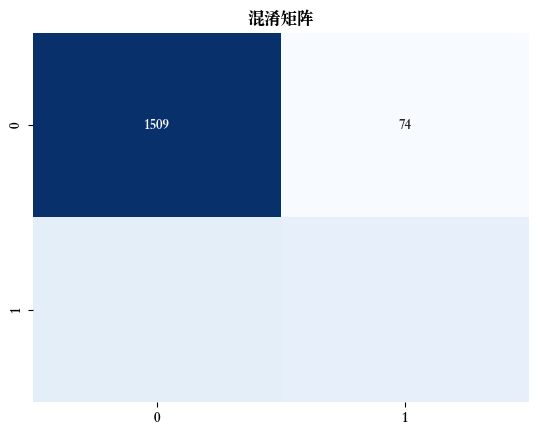

In [11]:
# 对多棵决策树进行聚合(Bagging)
from sklearn.ensemble import BaggingClassifier # 导入Bagging 分类器
from sklearn.tree import DecisionTreeClassifier # 导入决策树分类器
from sklearn.metrics import (f1_score, confusion_matrix) # 导入评估指标
dt = BaggingClassifier(DecisionTreeClassifier()) # 只使用一棵决策树
dt.fit(X_train, y_train) # 拟合模型
y_pred = dt.predict(X_test) # 进行预测
print(" 决策树测试准确率: {:.2f}%".format(dt.score(X_test, y_test)*100))
print(" 决策树测试F1 分数: {:.2f}%".format(f1_score(y_test, y_pred)*100))
bdt = BaggingClassifier(DecisionTreeClassifier()) # 树的Bagging
bdt.fit(X_train, y_train) # 拟合模型
y_pred = bdt.predict(X_test) # 进行预测
print(" 决策树Bagging 测试准确率: {:.2f}%".format(bdt.score(X_test, y_test)*100))
print(" 决策树Bagging 测试F1 分数: {:.2f}%".format(f1_score(y_test, y_pred)*100))
show_matrix(y_test, y_pred)
f1_bdt = f1_score(y_test, y_pred)*100

 随机森林测试准确率: 86.25%
 随机森林测试F1 分数: 58.89%


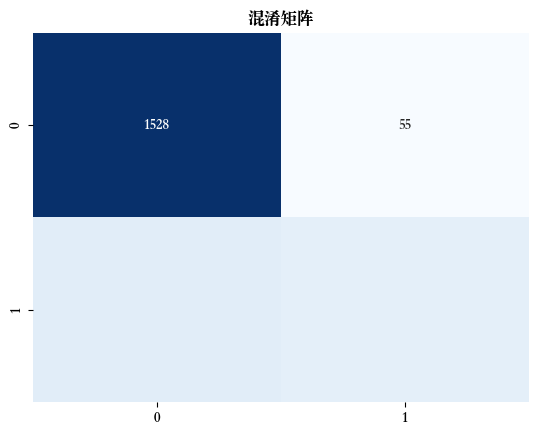

In [12]:
from sklearn.model_selection import GridSearchCV # 导入网格搜索工具
from sklearn.ensemble import RandomForestClassifier # 导入随机森林模型
rf = RandomForestClassifier() # 随机森林模型
rf.fit(X_train, y_train) # 拟合模型
y_pred = rf.predict(X_test) # 进行预测
print(" 随机森林测试准确率: {:.2f}%".format(rf.score(X_test, y_test)*100))
print(" 随机森林测试F1 分数: {:.2f}%".format(f1_score(y_test, y_pred)*100))
show_matrix(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)*100

 极端随机森林测试准确率: 85.30%
 极端随机森林测试F1 分数: 55.59%


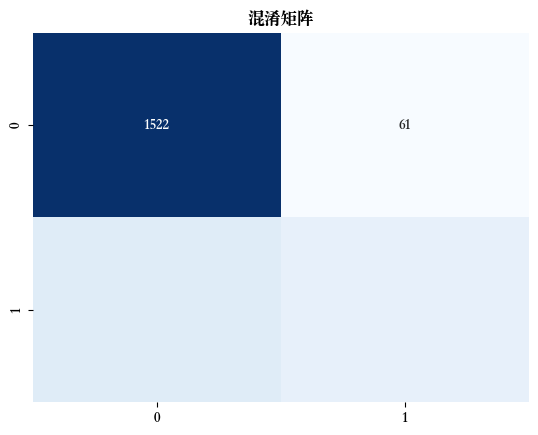

In [13]:
from sklearn.ensemble import ExtraTreesClassifier # 导入极端随机森林模型
ext = ExtraTreesClassifier() # 极端随机森林模型
ext.fit(X_train, y_train) # 拟合模型
y_pred = ext.predict(X_test) # 进行预测
print(" 极端随机森林测试准确率: {:.2f}%".format(ext.score(X_test, y_test)*100))
print(" 极端随机森林测试F1 分数: {:.2f}%".format(f1_score(y_test, y_pred)*100))
show_matrix(y_test, y_pred)
f1_ext = f1_score(y_test, y_pred)*100

AdaBoost 测试准确率: 79.90%
AdaBoost 测试F1 分数: 51.57%


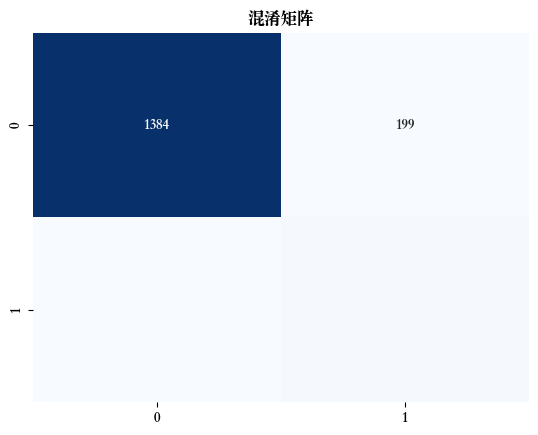

In [14]:
from sklearn.ensemble import AdaBoostClassifier # 导入AdaBoost 模型
dt = DecisionTreeClassifier() # 选择决策树分类器作为AdaBoost 的基准算法
ada = AdaBoostClassifier(dt) # AdaBoost 模型
ada.fit(X_train, y_train) # 拟合模型
y_pred = ada.predict(X_test) # 进行预测
print("AdaBoost 测试准确率: {:.2f}%".format(ada.score(X_test, y_test)*100))
print("AdaBoost 测试F1 分数: {:.2f}%".format(f1_score(y_test, y_pred)*100))
show_matrix(y_test, y_pred)
f1_ada = f1_score(y_test, y_pred)*100

 梯度提升测试准确率: 86.60%
 梯度提升测试F1 分数: 59.64%


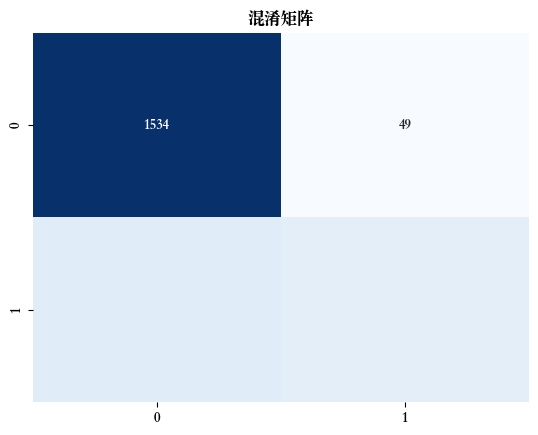

In [15]:
from sklearn.ensemble import GradientBoostingClassifier # 导入梯度提升模型
gb = GradientBoostingClassifier() # 梯度提升模型
gb.fit(X_train, y_train) # 拟合模型
y_pred = gb.predict(X_test) # 进行预测
print(" 梯度提升测试准确率: {:.2f}%".format(gb.score(X_test, y_test)*100))
print(" 梯度提升测试F1 分数: {:.2f}%".format(f1_score(y_test, y_pred)*100))
show_matrix(y_test, y_pred)
f1_gb = f1_score(y_test, y_pred)*100

XGB 测试准确率: 85.20%
XGB 测试F1 分数: 57.71%


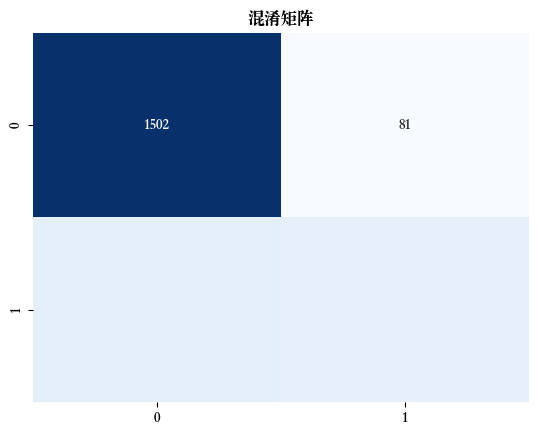

In [16]:
from xgboost import XGBClassifier # 导入XGB 模型
xgb = XGBClassifier() # XGB 模型
xgb.fit(X_train, y_train) # 拟合模型
y_pred = xgb.predict(X_test) # 进行预测
print("XGB 测试准确率: {:.2f}%".format(xgb.score(X_test, y_test)*100))
print("XGB 测试F1 分数: {:.2f}%".format(f1_score(y_test, y_pred)*100))
show_matrix(y_test, y_pred)
f1_xgb = f1_score(y_test, y_pred)*100

In [17]:
# from xgboost import XGBClassifier # 导入XGB 模型
# xgb = XGBClassifier() # XGB 模型
# # 使用网格搜索优化参数
# xgb_param_grid = {'min_child_weight': [1, 5, 10],
# 'gamma': [0.5, 1, 1.5, 2, 5],
# 'subsample': [0.6, 0.8, 1.0],
# 'colsample_bytree': [0.6, 0.8, 1.0],
# 'max_depth': [3, 4, 5]}
# xgb_gs = GridSearchCV(xgb, param_grid = xgb_param_grid,
# scoring="f1", n_jobs= 10, verbose = 1)
# xgb_gs.fit(X_train, y_train) # 拟合模型
# xgb_gs = xgb_gs.best_estimator_ # 最佳模型
# y_pred = xgb_gs.predict(X_test) # 进行预测
# print("XGB 测试准确率: {:.2f}%".format(xgb_gs.score(X_test, y_test)*100))
# print("XGB 测试F1分数: {:.2f}%".format(f1_score(y_test, y_pred)*100))
# show_matrix(y_test, y_pred)

In [18]:
from sklearn.ensemble import VotingClassifier # 导入Voting 模型
# 把各种模型的预测结果进行Voting。同学们还可以加入更多模型如SVM, KNN 等
voting = VotingClassifier(estimators=[('rf', rf),('bdt', bdt),('gb', gb),
                                      ('ext', ext),('xgb', xgb),('ada', ada)],
voting='soft', n_jobs=10)
voting = voting.fit(X_train, y_train) # 拟合模型
y_pred = voting.predict(X_test) # 进行预测
print("Voting 测试准确率: {:.2f}%", voting.score(X_test, y_test)*100)
print("Voting 测试F1分数: {:.2f}%", f1_score(y_test, y_pred)*100)

Voting 测试准确率: {:.2f}% 85.8
Voting 测试F1分数: {:.2f}% 58.600583090379


In [19]:
# from sklearn.model_selection import GridSearchCV # 导入网格搜索工具
# from sklearn.ensemble import RandomForestClassifier # 导入随机森林模型
# rf = RandomForestClassifier() # 随机森林模型
# # 使用网格搜索优化参数
# rf_param_grid = {"max_depth": [None],
# "max_features": [1, 3, 10],
# "min_samples_split": [2, 3, 10],
# "min_samples_leaf": [1, 3, 10],
# "bootstrap": [True, False],
# "n_estimators" :[100, 300],
# "criterion": ["gini"]}
# rf_gs = GridSearchCV(rf, param_grid = rf_param_grid,
# scoring="f1", n_jobs= 10, verbose = 1)
# rf_gs.fit(X_train, y_train) # 拟合模型
# rf_gs = rf_gs.best_estimator_ # 最佳模型
# y_pred = rf_gs.predict(X_test) # 进行预测
# print("调优后随机森林测试准确率: {:.2f}%".format(rf_gs.score(X_test, y_test)*100))
# print("调优后随机森林测试F1分数: {:.2f}%".format(f1_score(y_test, y_pred)*100))

In [20]:
X_train = np.asarray(X_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)

In [21]:
import keras # 导入Keras库
from keras.models import Sequential # 导入Keras序贯模型
from keras.layers import Dense # 导入Keras密集连接层
ann = Sequential() # 创建一个序贯ANN模型
ann.add(Dense(units=12, input_dim=11, activation = 'relu')) # 添加输入层
ann.add(Dense(units=24, activation = 'relu')) # 添加隐层
ann.add(Dense(units=48, activation = 'relu')) # 添加隐层
ann.add(Dense(units=1, activation = 'sigmoid')) # 添加输出层
ann.summary() # 显示网络模型（这个语句不是必须的）
# 编译神经网络，指定优化器，损失函数，以及评估标准
ann.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['acc'])
history = ann.fit(X_train, y_train, # 指定训练集
                  epochs=30,        # 指定训练的轮次
                  batch_size=64,    # 指定数据批量
                  validation_split=0.2) #指定验证集,这里为了简化模型，直接用训练集数据
# show_history(history) # 调用这个函数

/Users/pangjiawei/.pyenv/versions/anaconda3-2024.02-1/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │           312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 48)             │         1,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            49 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,705 (6.66 KB)

 Trainable params: 1,705 (6.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - acc: 0.7834 - loss: 0.5564 - val_acc: 0.7875 - val_loss: 0.4892
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - acc: 0.8001 - loss: 0.4704 - val_acc: 0.7931 - val_loss: 0.4769
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - acc: 0.8150 - loss: 0.4420 - val_acc: 0.7994 - val_loss: 0.4616
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - acc: 0.7970 - loss: 0.4660 - val_acc: 0.8056 - val_loss: 0.4507
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - acc: 0.8075 - loss: 0.4401 - val_acc: 0.8056 - val_loss: 0.4467
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - acc: 0.8164 - loss: 0.4176 - val_acc: 0.8150 - val_loss: 0.4272
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - acc: 0.8311 - loss: 0.4064 - val_acc: 0.8281 - val_loss: 0.4246
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - acc: 0.8278 - loss: 0.4050 - val_acc: 0.8213 - val_loss: 0.4122
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 

In [22]:
y_pred = ann.predict(X_test,batch_size=10) # 预测测试集的标签
y_pred = np.round(y_pred) # 将分类概率值转换成0/1整数值
print("神经网络测试F1分数: {:.2f}%".format(f1_score(y_test, y_pred)*100))

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 177us/step
神经网络测试F1分数: 54.40%


/Users/pangjiawei/.pyenv/versions/anaconda3-2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


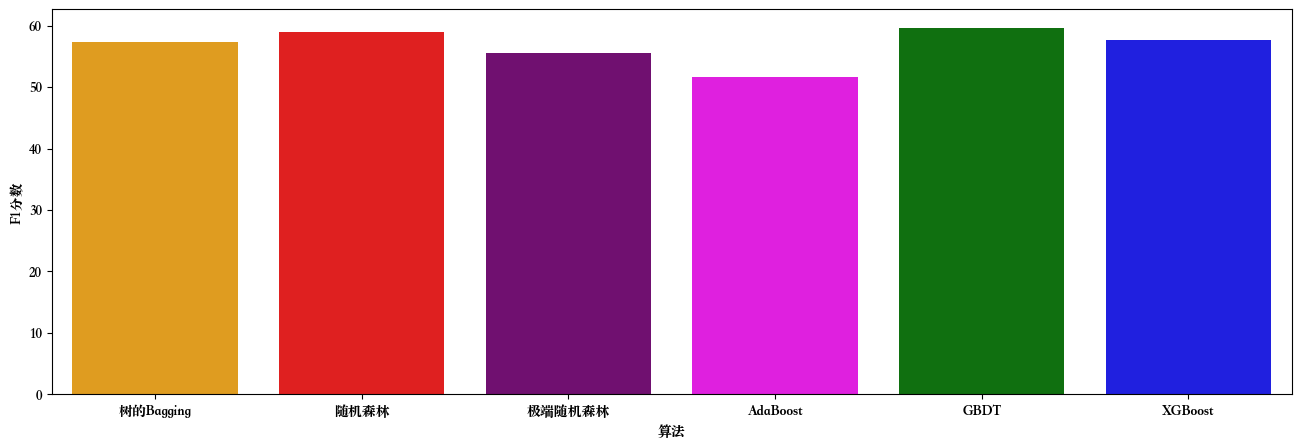

In [23]:
# plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
# plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
# plt.rcParams["font.family"]=['SimHei']
methods = ["树的Bagging", "随机森林", "极端随机森林",
"AdaBoost", "GBDT", "XGBoost"]
f1 = [f1_bdt, f1_rf, f1_ext, f1_ada, f1_gb, f1_xgb]
colors = ["orange", "red", "purple", "magenta", "green", "blue"]
# sns.set_style("whitegrid")
plt.figure(figsize=(16, 5))
plt.yticks(np.arange(0, 100, 10))
plt.ylabel("F1分数")
plt.xlabel("算法")
sns.barplot(x=methods, y=f1, palette=colors)
# plt.grid(b=None)
plt.show()